Found 176 images belonging to 2 classes.
Found 44 images belonging to 2 classes.
Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5241 - loss: 0.9065 - val_accuracy: 0.5227 - val_loss: 0.6915
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5690 - loss: 0.6805 - val_accuracy: 0.5227 - val_loss: 0.6973
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7932 - loss: 0.5957 - val_accuracy: 0.5455 - val_loss: 0.6936
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8781 - loss: 0.3913 - val_accuracy: 0.5455 - val_loss: 0.7478
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9334 - loss: 0.2520 - val_accuracy: 0.4545 - val_loss: 0.8638
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9945 - loss: 0.1422 - val_accuracy: 0.5227 - val_loss: 1.0803


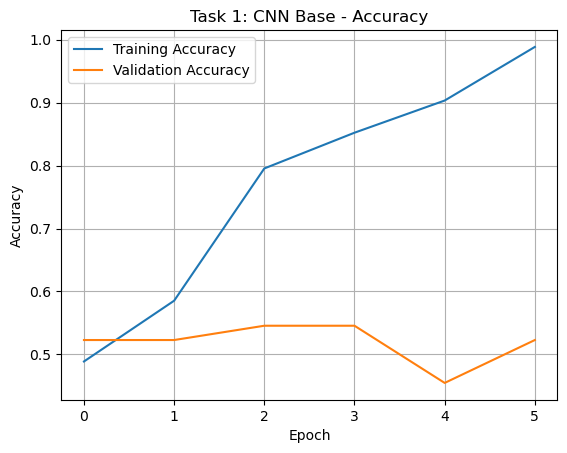

Final Training Accuracy: 0.99
Final Validation Accuracy: 0.52


In [ ]:
# 1.自行建構、訓練 CNN 模型，衡量模型預測績效

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# parameter
base_path = "dataset/train"
IMG_SIZE = (128, 128)
BATCH_SIZE = 16
EPOCHS = 20
results = {}

# Baseline：無增強
datagen_base = ImageDataGenerator(rescale=1./255, validation_split=0.2)

def get_generators(datagen):
    train_gen = datagen.flow_from_directory(
        base_path,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='training'
    )
    val_gen = datagen.flow_from_directory(
        base_path,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation'
    )
    return train_gen, val_gen

#build simple CNN model
def build_model(version):
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
    model.add(MaxPooling2D(2,2))

    if version in ['reg', 'full']:
        model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))

    if version in ['reg', 'full']:
        model.add(BatchNormalization())

    model.add(Flatten())
    if version in ['dropout', 'reg', 'full']:
        model.add(Dropout(0.3))

    if version == 'reg':
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    else:
        model.add(Dense(64, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# train and evaluate model
def train_and_plot(model, train_data, val_data, title):
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # plot accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # output final result
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    print(f"Final Training Accuracy: {final_train_acc:.2f}")
    print(f"Final Validation Accuracy: {final_val_acc:.2f}")
    return history

# Run Task 1
train_gen, val_gen = get_generators(datagen_base)
model_task1 = build_model("base")
history_task1 = train_and_plot(model_task1, train_gen, val_gen, 'Task 1: CNN Base')

Found 176 images belonging to 2 classes.
Found 44 images belonging to 2 classes.
Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4560 - loss: 2.0682 - val_accuracy: 0.5000 - val_loss: 0.7029
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5174 - loss: 0.6988 - val_accuracy: 0.4773 - val_loss: 0.6954
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4610 - loss: 0.6925 - val_accuracy: 0.5227 - val_loss: 0.6958
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5109 - loss: 0.6884 - val_accuracy: 0.6136 - val_loss: 0.6900
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5733 - loss: 0.6835 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5631 - loss: 0.6821 - val_accuracy: 0.4545 - val_loss: 0.6925
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6455 - loss: 0.6709 - val_accuracy: 0.4773 - val_loss: 0.6957
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━

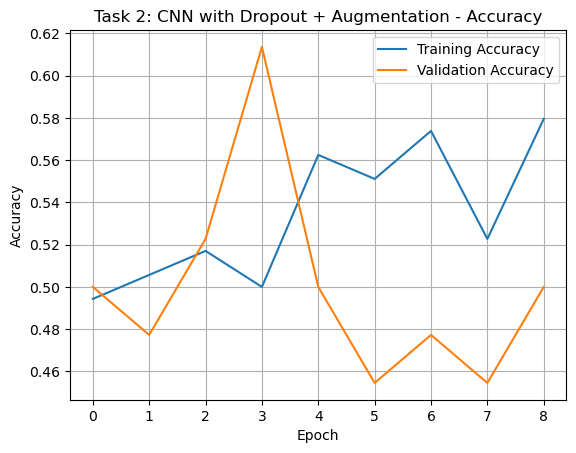

Final Training Accuracy: 0.58
Final Validation Accuracy: 0.50


In [ ]:
#2.使用資料增強(data augmentation)技術，觀察可否提升模型預測績效？

# 資料增強版
datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)
train_gen2, val_gen2 = get_generators(datagen_aug)
model2 = build_model("dropout")
history2 = train_and_plot(model2, train_gen2, val_gen2, "Task 2: CNN with Dropout + Augmentation")

In [14]:
def train_and_evaluate(version, datagen):
    print(f"\n 訓練版本：{version}")
    train_gen, val_gen = get_generators(datagen)
    model = build_model(version)
    early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=EPOCHS,
        callbacks=[early],
        verbose=1
    )
    results[version] = history
    return model

In [15]:
model_base = train_and_evaluate('base', datagen_base)
model_aug = train_and_evaluate('dropout', datagen_aug)
model_reg = train_and_evaluate('reg', datagen_aug)


 訓練版本：base
Found 176 images belonging to 2 classes.
Found 44 images belonging to 2 classes.
Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4907 - loss: 2.3987 - val_accuracy: 0.5000 - val_loss: 0.6957
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5493 - loss: 0.6879 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5179 - loss: 0.6904 - val_accuracy: 0.5000 - val_loss: 0.6962
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6601 - loss: 0.6804 - val_accuracy: 0.5227 - val_loss: 0.6992
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5870 - loss: 0.6579 - val_accuracy: 0.5227 - val_loss: 0.6951
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6257 - loss: 0.6407 - val_accuracy: 0.5000 - val_loss: 0.7030
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6640 - loss: 0.6072 - val_accuracy: 0.5682 - val_loss: 0.7273

 訓練版本：dropout
Found 176 

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39511 (\N{CJK UNIFIED IDEOGRAPH-9A57}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35657 (\N{CJK UNIFIED IDEOGRAPH-8B49}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170:

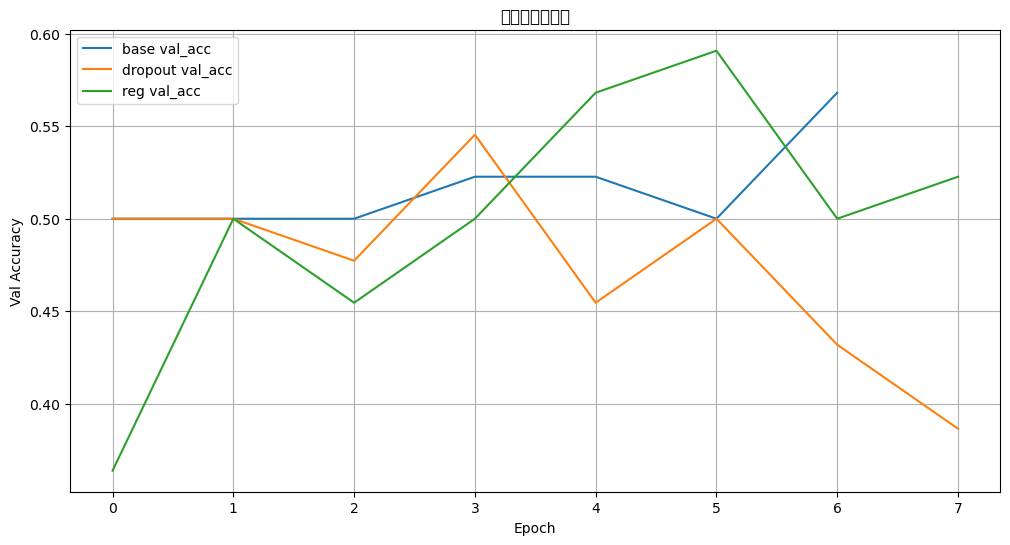

In [ ]:
#3
plt.figure(figsize=(12,6))
for key in results:
    plt.plot(results[key].history['val_accuracy'], label=f"{key} val_acc")
plt.title("驗證準確率比較")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show() 